# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [24]:
import numpy as np
from scipy.linalg import svd
from scipy import linalg

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [25]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)
print("Matriz A")
print(A) 
print()
print("Matriz u")
print(u)
print()
print("Matriz s")
print(s)
print()
print("Matriz vh")
print(vh)

Matriz A
[[0.1 0.5]
 [0.4 0.8]]

Matriz u
[[-0.48835631 -0.87264432]
 [-0.87264432  0.48835631]]

Matriz s
[1.02285697 0.11731846]

Matriz vh
[[-0.38900195 -0.92123693]
 [ 0.92123693 -0.38900195]]


#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [26]:
def svd_validation(A):
    u, s, vh = svd(A)
    a=0
    for i in range(min(A.shape)-1):
        a= s[i]*np.array([u.T[i]]).T@ np.array([vh[i]]) + a
    return np.allclose(A,a)

In [27]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

False

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

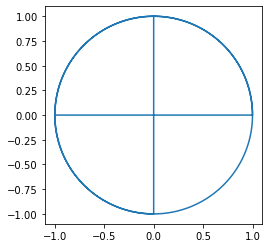

In [30]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [31]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


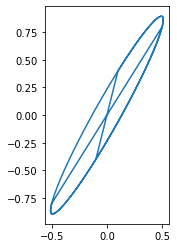

In [32]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [33]:
u, s, vh = svd(A) 
M,N = A.shape
Sig = linalg.diagsvd(s,M,N)

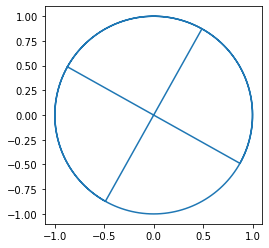

In [34]:
show_circle(u @ circle)

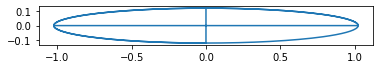

In [35]:
show_circle(np.array([[s[0], 0], [0 , s[1]]] @ circle))

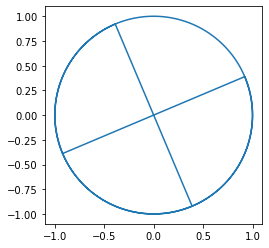

In [36]:
show_circle(vh @ circle)

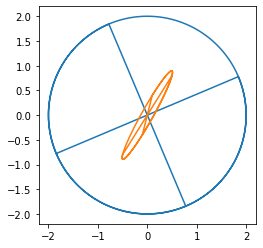

In [37]:
show_circle(2*vh @ circle)  # En azul si el det=! 1.
show_circle(u@Sig@vh @ circle)  #Naranjo aplicando A como la descomposición svd

__Respuesta:__ Podemos decir que U y V rotan la circunferencia unitaria y S la vuelve una elipse; además podemos ver que si U y V no fueran unitarios influiria en que el resultado no sería una circunferencia unitaria.

__Respuesta:__ Como son descomposición de A, si se aplican paso a paso cada uno de los operadores se puede obtener la misma figura.

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [8]:
from pathlib import Path
from PIL import Image

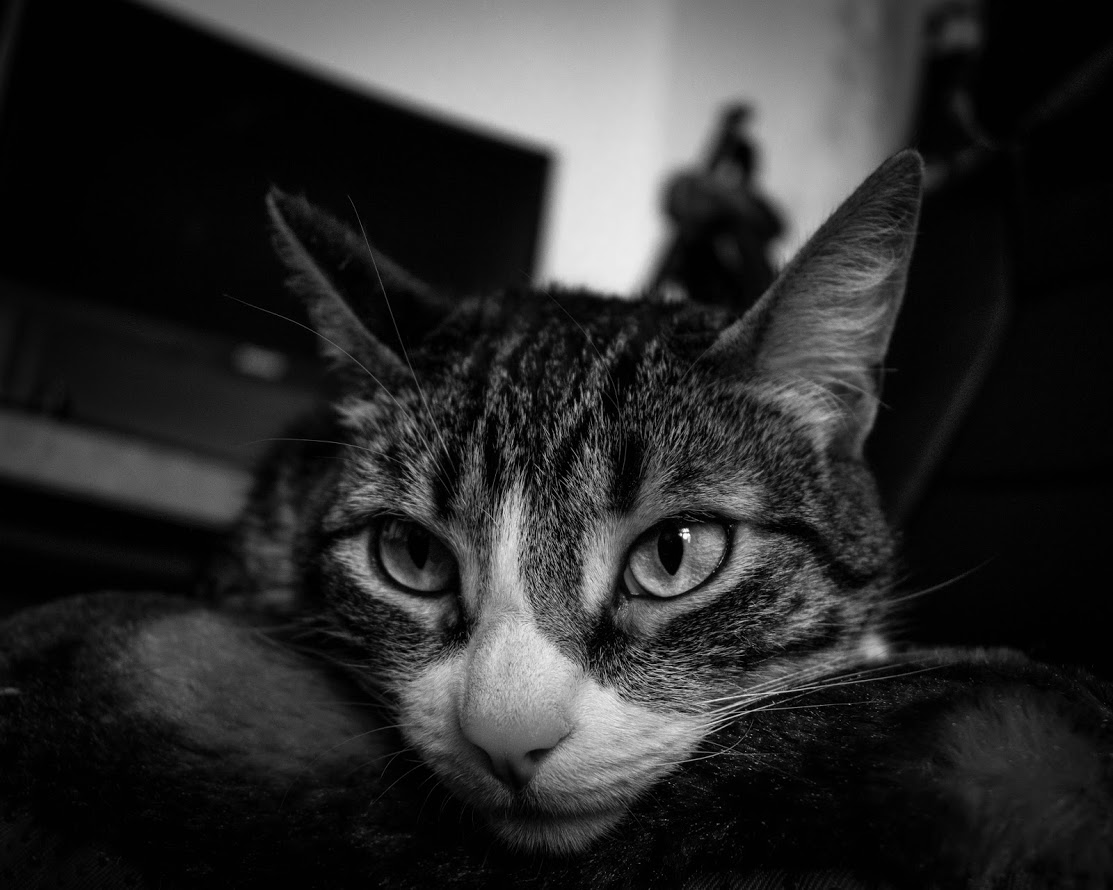

In [9]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [10]:
cat_np = np.array(cat)
print(cat_np.shape)

NameError: name 'np' is not defined

#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [11]:
def low_rank_svd_approximation(A, l):
    u, s, vh = svd(A)
    a=0
    for i in range(l):
        a= s[i]*np.array([u.T[i]]).T@ np.array([vh[i]]) + a
    print(f"el error es: {linalg.norm((A-a),'fro')} ")
    return a

In [12]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

NameError: name 'cat_np' is not defined

In [13]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

NameError: name 'cat_np' is not defined

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [14]:
# def low_rank_svd_tol_approximation(A, tol):
#     u, s, vh = svd(A)
#     a=0
#     c=0
#     for j in range(len(s)):
#         if ((s[j+1:]**2).sum()/(s**2).sum())**0.5 <= tol:
#             c=c+1
#         else:
#             a=0
#             for i in range(c):
#                 a= s[i]*np.array([u.T[i]]).T@ np.array([vh[i]]) + a
#                 print(l)
#     return a


In [15]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

NameError: name 'low_rank_svd_tol_approximation' is not defined

In [16]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

NameError: name 'low_rank_svd_tol_approximation' is not defined

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

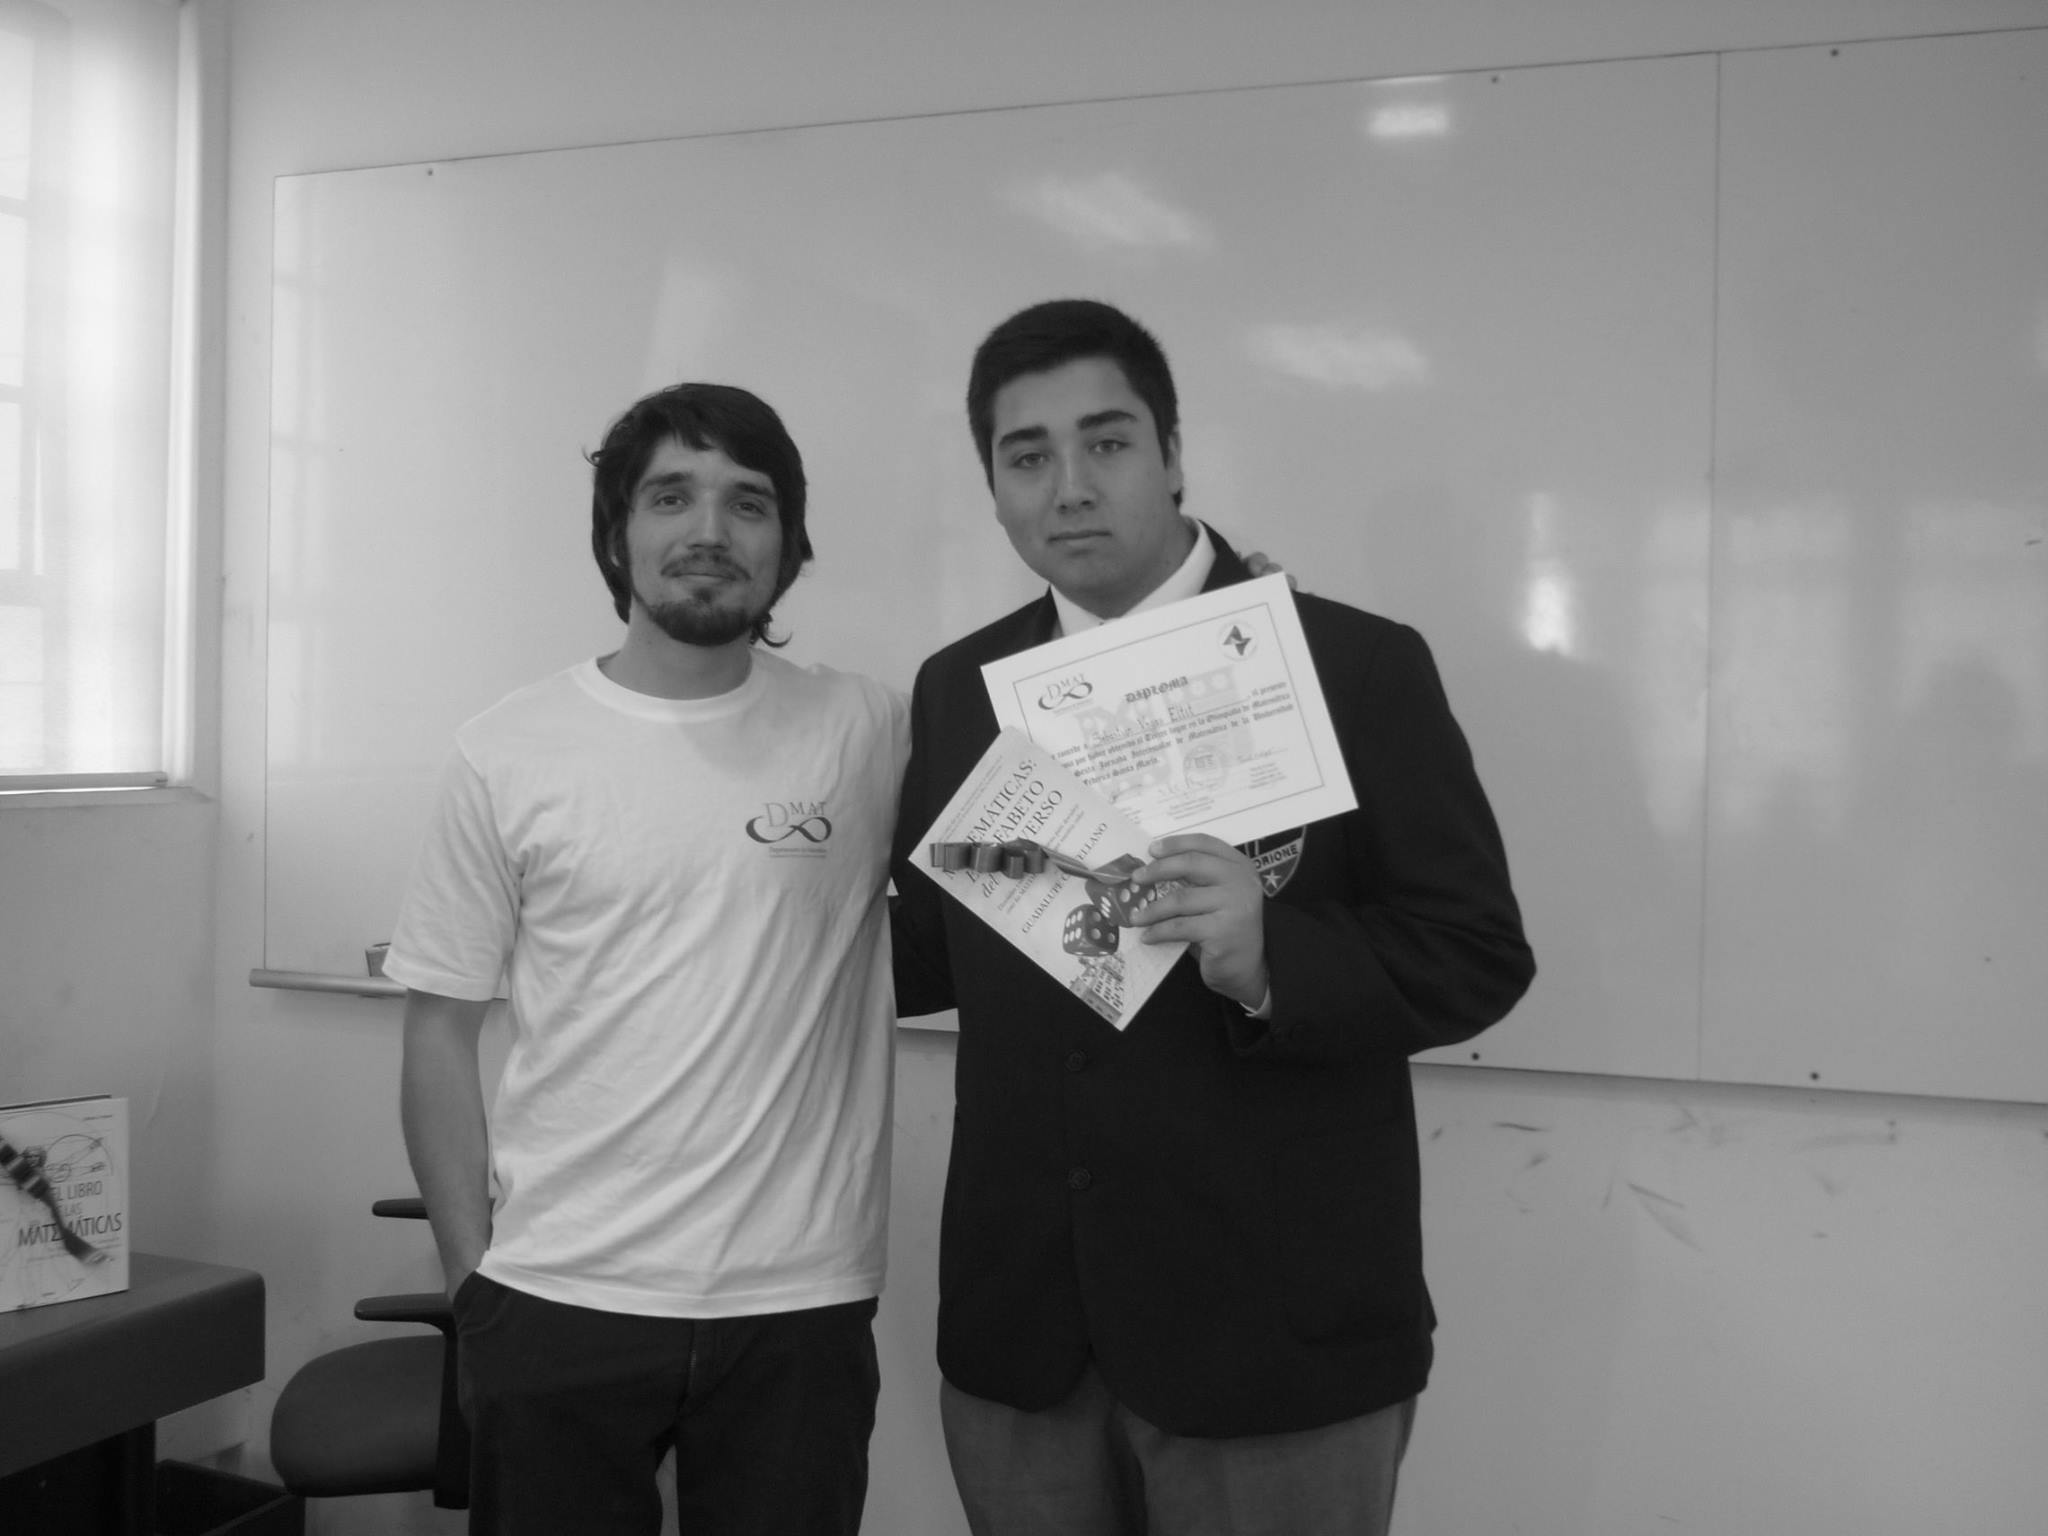

In [17]:
your_img_name = 'JIM.jpg'
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img

In [18]:
your_img_np = np.array(your_img)

NameError: name 'np' is not defined

In [19]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

NameError: name 'your_img_np' is not defined

In [20]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

NameError: name 'your_img_np' is not defined

In [59]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

NameError: name 'low_rank_svd_tol_approximation' is not defined

In [50]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

NameError: name 'low_rank_svd_tol_approximation' is not defined

In [60]:
np.array(your_img).nbytes

3145728

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ Pensando en que mi computador la imagen pesa 128kb, pareciera al menos que guardar la matriz con los datos no es un método eficiente (3145728 byte) para guardar imágenes

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [61]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [63]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [64]:
start_date = 2020-10-1
end_date = 2020-10-11

In [65]:
covid_tasa_promedio_nuevos = ( covid_comunas.loc[lambda x: x["codigo_comuna"]
                      .notnull()].drop(['codigo_region', 'codigo_comuna'],axis=1).fillna(0)
    .melt(id_vars=['region' ,'comuna' , 'poblacion'], value_vars=['2020-10-02' , '2020-10-05' , '2020-10-09'], var_name='fecha', value_name='casos_totales')
    .assign(casos_nuevos = lambda x: x.groupby(['comuna'])['casos_totales'].diff()).groupby(['region','comuna','poblacion'])
    .agg(promedio_casos_nuevos=("casos_nuevos", "mean")).reset_index(level='poblacion').assign(tasa_promedio_casos_nuevos= lambda x: x['promedio_casos_nuevos']*100000/x['poblacion'])
    .sort_values('tasa_promedio_casos_nuevos',ascending=False)
    )

In [66]:
covid_tasa_promedio_nuevos

poblacion  promedio_casos_nuevos  \
region     comuna                                           
Magallanes Timaukel          282.0                    5.0   
           Porvenir         7323.0                   45.5   
           Punta Arenas   141984.0                  646.0   
           San Gregorio      681.0                    2.5   
           Natales         23782.0                   80.0   
...                            ...                    ...   
Maule      Empedrado        4206.0                    0.0   
Los Lagos  Quemchi          8783.0                    0.0   
Aysén      Tortel            572.0                    0.0   
Biobío     Contulmo         6330.0                    0.0   
O’Higgins  La Estrella      3114.0                   -0.5   

                         tasa_promedio_casos_nuevos  
region     comuna                                    
Magallanes Timaukel                     1773.049645  
           Porvenir                      621.330056  
           Punta Arenas                  454.980843  
           San Gregorio                  367.107195  
           Natales                       336.388866  
...                                             ...  
Maule      Empedrado                       0.000000  
Los Lagos  Quemchi                         0.000000  
Aysén      Tortel                          0.000000  
Biobío     Contulmo                        0.000000  
O’Higgins  La Estrella                   -16.056519  

[346 rows x 3 columns]

__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__Confirmando la hipótesis planteada tenemos que la mayor tasa promedio de casos nuevos se encuentra en la región de Magallanes, confirmándola como una región critica.

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [67]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,794,738,737,832,542,343,706,777,1058,1025
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,972,932,1046,1044,796,714,694,946,1752,906
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1571,1890,2239,3825,1749,1354,1858,1238,1906,2549
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,792,838,1020,939,563,340,237,838,863,781
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1008,1128,1057,1026,473,1503,1050,1125,1351,1245


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [68]:
fech=[]
for columns in covid_pcr.drop(['region','codigo_region', 'poblacion'],axis=1):
    fech.append(columns)

In [69]:
covid_pcr_melt = (covid_pcr.drop(['codigo_region', 'poblacion'],axis=1).melt(id_vars=['region'], value_vars=fech, var_name='fecha', value_name='nm_pcr').fillna(0))
covid_pcr_melt['fecha']=pd.to_datetime(covid_pcr_melt['fecha'])
covid_pcr_melt=covid_pcr_melt.groupby(["region", "fecha"]).agg(nm_pcr=("nm_pcr", "sum"))

covid_pcr_melt

nm_pcr
region      fecha             
Antofagasta 2020-04-09   182.0
            2020-04-10   128.0
            2020-04-11   107.0
            2020-04-12   175.0
            2020-04-13   103.0
...                        ...
Ñuble       2020-10-28   536.0
            2020-10-29  1144.0
            2020-10-30   948.0
            2020-10-31  1080.0
            2020-11-01   928.0

[3312 rows x 1 columns]

Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [70]:
fecho=[]
for columns in covid_comunas.drop(['region','codigo_region','comuna','codigo_comuna' ,'poblacion','tasa'],axis=1):
    fecho.append(columns)

covid_casos_melt = (covid_comunas.drop(['codigo_region','comuna','codigo_comuna' ,'poblacion'],axis=1).melt(id_vars=['region'], value_vars=fecho, var_name='fecha', value_name='casos_comuna').fillna(0)
                    )
covid_casos_melt['fecha']=pd.to_datetime(covid_casos_melt['fecha'])
covid_casos_melt=covid_casos_melt.groupby(["region", "fecha"]).agg(casos_totales=("casos_comuna", "sum"))
covid_casos_melt

casos_totales
region      fecha                    
Antofagasta 2020-03-30           29.0
            2020-04-01           32.0
            2020-04-03           49.0
            2020-04-06           65.0
            2020-04-08           72.0
...                               ...
Ñuble       2020-10-16         9129.0
            2020-10-19         9270.0
            2020-10-24         9534.0
            2020-10-26         9634.0
            2020-10-30         9815.0

[1024 rows x 1 columns]

Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [71]:
covid_corr_casos_pcr = ( pd.merge(covid_pcr_melt, covid_casos_melt, how='outer', on=['region', 'fecha'])  
)
covid_corr_casos_pcr['nm_pcr']= covid_corr_casos_pcr['nm_pcr'].fillna(0)
covid_corr_casos_pcr['casos_totales']= covid_corr_casos_pcr['casos_totales'].fillna(method='ffill')
covid_corr_casos_pcr=covid_corr_casos_pcr.groupby('region').corr()
covid_corr_casos_pcr = (covid_corr_casos_pcr.drop(covid_corr_casos_pcr[covid_corr_casos_pcr['nm_pcr']==1].index)
                        .drop('casos_totales', axis=1).sort_values('nm_pcr', ascending= True)
                         .reset_index().drop('level_1', axis=1).set_index('region').rename(columns={'nm_pcr': 'correlacion'})['correlacion']
                        )
covid_corr_casos_pcr

region
O’Higgins             0.223822
Aysén                 0.272763
Los Ríos              0.506008
Metropolitana         0.522020
Ñuble                 0.586631
Magallanes            0.665059
Atacama               0.700565
Tarapacá              0.748722
Araucanía             0.763462
Antofagasta           0.771074
Los Lagos             0.793444
Coquimbo              0.803995
Biobío                0.816627
Maule                 0.830243
Valparaíso            0.841302
Arica y Parinacota    0.860587
Name: correlacion, dtype: float64

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__  Como deberiamos pensar, entre más pcr se hagan, más casos confirmados deberian haber por región, lo que significaria que a mayor correlación mayor cantidad de de confirmados, pero la realidad es que la región con mayor cantidad de contagiados (y con diferencia) es la Metropolitana que tiene un valor de correlación baja, así que no coincide mucho con mi sentido común.

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ que porcentaje de ventiladores mecánicos estaban dedicados al sistema UCI el día en que habian menos ventiladores mecánicos disponibles a nivel nacional del total combinando todos los sistemas.

In [72]:
covid_vent_uci = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto30/PacientesVMI_T.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_")).set_index('casos').rename_axis('fechas')
)
covid_vent_uci.head()

,pacientes_vmi,pacientes_no_vm,pacientes_vm_no_invasiva
fechas,,,
2020-04-11,322.0,NaN,NaN
2020-04-12,328.0,NaN,NaN
2020-04-13,330.0,NaN,NaN
2020-04-14,315.0,NaN,NaN
2020-04-15,315.0,NaN,NaN


In [73]:
covid_vent = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto20/NumeroVentiladores_T.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_")).set_index('ventiladores').rename_axis('fecha')
)
covid_vent.head()

,total,disponibles,ocupados
fecha,,,
2020-04-14,1550.0,564.0,986.0
2020-04-15,1563.0,577.0,986.0
2020-04-16,1582.0,569.0,1013.0
2020-04-17,1604.0,579.0,1025.0
2020-04-18,1627.0,588.0,1039.0


In [74]:
covid_vent['disponibles'][covid_vent['disponibles'] == covid_vent['disponibles'].min()].index[0]   #fecha en el que habían menos ventiladores disponibles

V_TOT_CHI=covid_vent.loc[covid_vent['disponibles'][covid_vent['disponibles'] == covid_vent['disponibles'].min()].index[0]]['total']

V_UCI= (covid_vent_uci.loc[covid_vent['disponibles'][covid_vent['disponibles'] == covid_vent['disponibles'].min()].index[0]]['pacientes_vmi'] 
+ covid_vent_uci.loc[covid_vent['disponibles'][covid_vent['disponibles'] == covid_vent['disponibles'].min()].index[0]]['pacientes_vm_no_invasiva'])

Por_UCI= (V_UCI/V_TOT_CHI) *100
print(f" {Por_UCI}%")

 60.0264725347452%


__Respuesta:__  Aproximadamente un 60% del total de los ventiladores mecánicos de todo Chile estaban destinados a pacientes en la UCI, es decir en el día más crítico respecto a la cantidad de ventiladores disponibles, más de la mitad de los pacientes estaba en alguna condición de estado grave.

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ Cuál es la proporción aproximada de personas sintomáticas y asintomáticas diagnosticadas en la región de Valparaíso en el mes de octubre

In [75]:
covid_ssint = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto27/CasosNuevosSinSintomas_T.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_")).drop(range(155),axis=0).set_index('region').rename_axis('fecha')
) 
covid_ssint.head()

,arica_y_parinacota,tarapacá,antofagasta,atacama,coquimbo,valparaíso,metropolitana,o'higgins,maule,ñuble,biobío,araucania,los_ríos,los_lagos,aysén,magallanes,total
fecha,,,,,,,,,,,,,,,,,
2020-10-01,33.0,12.0,16.0,18.0,7.0,25.0,103.0,22.0,75.0,9.0,63.0,38.0,17.0,45.0,11.0,17.0,511.0
2020-10-02,32.0,8.0,31.0,9.0,15.0,29.0,136.0,23.0,69.0,15.0,45.0,30.0,35.0,75.0,6.0,27.0,585.0
2020-10-03,22.0,9.0,31.0,18.0,14.0,38.0,82.0,32.0,43.0,12.0,37.0,63.0,27.0,93.0,10.0,74.0,605.0
2020-10-04,24.0,6.0,25.0,11.0,6.0,54.0,111.0,15.0,83.0,12.0,53.0,45.0,21.0,67.0,11.0,86.0,630.0
2020-10-05,17.0,7.0,37.0,13.0,19.0,20.0,108.0,27.0,49.0,9.0,21.0,41.0,13.0,80.0,1.0,19.0,481.0


In [76]:
 covid_csint = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto26/CasosNuevosConSintomas_T.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_")).drop(range(212),axis=0).set_index('region').rename_axis('fecha')
 )    
covid_csint.head()
covid_csint['valparaíso']

fecha
2020-10-01    93.0
2020-10-02    83.0
2020-10-03    94.0
2020-10-04    98.0
2020-10-05    63.0
2020-10-06    83.0
2020-10-07    60.0
2020-10-08    73.0
2020-10-09    81.0
2020-10-10    89.0
2020-10-11    87.0
2020-10-12    76.0
2020-10-13    46.0
2020-10-14    40.0
2020-10-15    66.0
2020-10-16    73.0
2020-10-17    88.0
2020-10-18    85.0
2020-10-19    55.0
2020-10-20    48.0
2020-10-21    51.0
2020-10-22    55.0
2020-10-23    56.0
2020-10-24    63.0
2020-10-25    61.0
2020-10-26    47.0
2020-10-27    27.0
2020-10-28    36.0
2020-10-29    53.0
2020-10-30    46.0
2020-10-31    49.0
2020-11-01    62.0
Name: valparaíso, dtype: float64

In [77]:
valp_merge=(pd.merge(covid_ssint['valparaíso'],covid_csint['valparaíso'], how='outer', on=['fecha'],suffixes=('_asintomaticos', '_sintomaticos'))
            .assign(total= lambda df: abs(df["valparaíso_asintomaticos"] + df["valparaíso_sintomaticos"]))
           .assign(diferencia= lambda df: abs(df["valparaíso_asintomaticos"] - df["valparaíso_sintomaticos"]))
           )
        
valp_merge.head()
tot=valp_merge["total"].sum()
asintpor=(valp_merge["valparaíso_asintomaticos"].sum()/tot)*100
sintpor=(valp_merge["valparaíso_sintomaticos"].sum()/tot)*100

print(f"El porcentaje de asintomaticos en el mes de Octubre fue {asintpor}%\n")
print(f"El porcentaje de sintomaticos en el mes de Octubre fue {sintpor}%\n")      


El porcentaje de asintomaticos en el mes de Octubre fue 27.534722222222225%

El porcentaje de sintomaticos en el mes de Octubre fue 72.46527777777779%



__Respuesta:__ Podemos decir de forma aproximada que cada 3 personas sintomáticas de COVID-19, existe una persona asintomática en la región de Valparaíso en el mes de Octubre.